<a href="https://colab.research.google.com/github/liscolme/EscapeEarth/blob/main/Interns/Elise/ClassTest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## mount google drive to access files

from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
## typical imports
%matplotlib inline
!pip install lightkurve==1.9.0 #b/c non-standard library
import lightkurve as lk
import numpy as np
import pandas as pd

In [ ]:
## import our custom modules

import sys
sys.path.append('/content/gdrive/My Drive/EscapeEarthData/')
import OpenAndPlot as op

In [ ]:
## get target info

target_list14 =  pd.read_csv('/content/gdrive/My Drive/EscapeEarthData/all_targets_S014_v1.csv',skiprows=5) #from sector 14
target_list14

,TICID,Camera,CCD,Tmag,RA,Dec
0,7582594,2,3,8.57,272.3966,45.8308
1,7582633,2,3,9.92,272.3288,45.9244
2,7582634,2,3,10.48,272.3307,45.9255
3,7583285,2,2,11.30,272.3711,47.2259
4,7584049,2,2,8.50,272.5282,47.0887
...,...,...,...,...,...,...
19995,1980752885,2,1,16.91,303.1632,60.2862
19996,1980968952,2,1,8.65,301.3995,63.7061
19997,1980968953,2,1,8.76,301.3993,63.7056
19998,1981207128,2,1,7.88,300.4913,65.8903


# Initiate our custom class


---



---



In [ ]:
## start using our custom class

#format our target info for the class
target_id = 7582633 
target_sector = 14
first_star = [target_id,target_sector]

#initiate a class with our data
first_target = op.OpenAndPlot(first_star)

#check class representation of target
print( first_target, '\n', type(first_target) ) 

TIC: 7582633 
 <class 'OpenAndPlot.OpenAndPlot'>


# Test custom class attributes

In [ ]:
## test a few class attributes

first_target.targetid, first_target.sector #, first_target.telescope

(7582633, 14)

In [ ]:
def open_clean_lc(sector, targetid):
  try:
    lc_file = lk.open('/content/gdrive/My Drive/EscapeEarthData/Sec{}_cleaned/{}/lc.fits'.format(sector,targetid))
    lc = lc_file.FLUX
    return lc
  except FileNotFoundError:
      lc = 'None'
      return lc

In [ ]:
mysector = 14
mytargetid = 7582633
mylc = open_clean_lc(mysector, mytargetid)
mylc

TessLightCurve(TICID: None)

# Test custom class methods

In [ ]:
## use custom class methods to open target data

lc = first_target.open_clean_lc()
print( lc, '\n', type(lc) ) 

TessLightCurve(TICID: None) 
 <class 'lightkurve.lightcurve.TessLightCurve'>


Notice the above object type that prints is a lightkurve class object - specifically a TessLightCurve object within the LightKurve class library. Let's get sidetracked to explore that in the next cell

In [ ]:
## check lightKurve class attributes

print( 'Flux array:', lc.flux, '\nTime array:', lc.time )
#checking with have access to the lightKurve class
lc.scatter();

Flux array: [16627.549 16620.307 16624.457 ... 16657.322 16679.496 16668.094] 
Time array: [1683.35583852 1683.35722739 1683.35861626 ... 1707.64703174 1707.6484206
 1707.64980946]


In [ ]:
## test another custom class method to open data

first_data = first_target.open_lc(stage='clean') #opens data with our function

print( first_data, '\nFlux array:', first_data.flux, '\nTime array:', first_data.time ) #use lk class attributes to explore data

TessLightCurve(TICID: None) 
Flux array: [16627.549 16620.307 16624.457 ... 16657.322 16679.496 16668.094] 
Time array: [1683.35583852 1683.35722739 1683.35861626 ... 1707.64703174 1707.6484206
 1707.64980946]


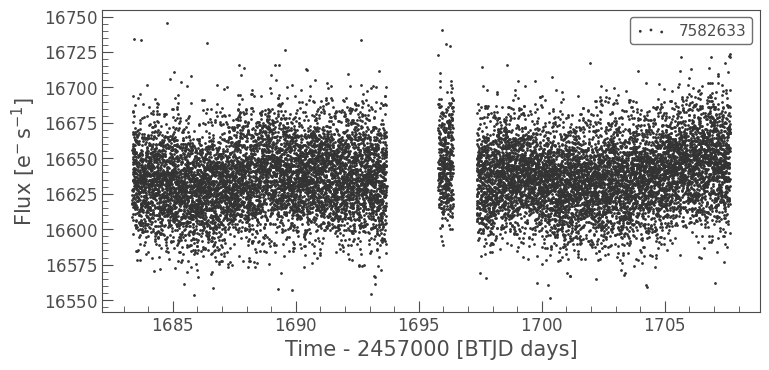

In [ ]:
## test custom class method to plot cleaned data

plot = first_target.plot_cleaned_lc()
plot

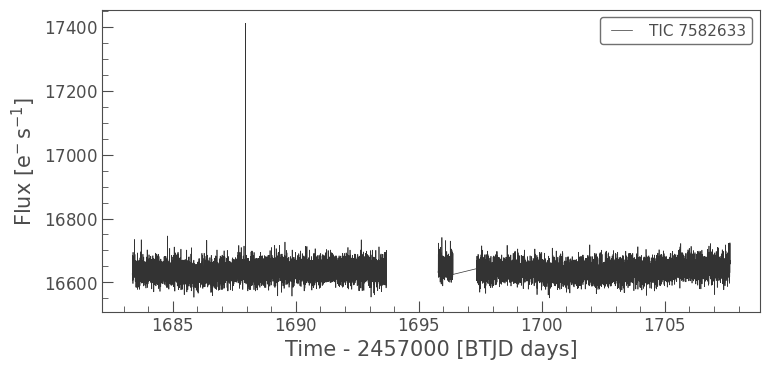

In [ ]:
## test custom class method to plot raw data
%matplotlib inline

first_target.plot_raw_data();

# Now try these out yourself with a second target. 
## Use the target 26489741 from Sector 15


---



---



In [ ]:
#format our target info for the class
target2_id = 26489741 
target2_sector = 15
second_star = [target2_id,target2_sector]

#initiate a class with our data
second_target = op.OpenAndPlot(second_star)

In [ ]:
second_target.targetid, second_target.sector

(26489741, 15)

In [ ]:
lc = second_target.open_clean_lc()
print( lc, '\n', type(lc) ) 

TessLightCurve(TICID: None) 
 <class 'lightkurve.lightcurve.TessLightCurve'>


In [ ]:
second_data = second_target.open_lc(stage='clean') #opens data with our function

print( second_data, '\nFlux array:', second_data.flux, '\nTime array:', second_data.time ) #use lk class attributes to explore data

TessLightCurve(TICID: None) 
Flux array: [276430.78 276441.06 276290.2  ... 274605.38 274522.56 274482.7 ] 
Time array: [1711.36696444 1711.36835332 1711.3697422  ... 1737.40830615 1737.40969502
 1737.41108389]


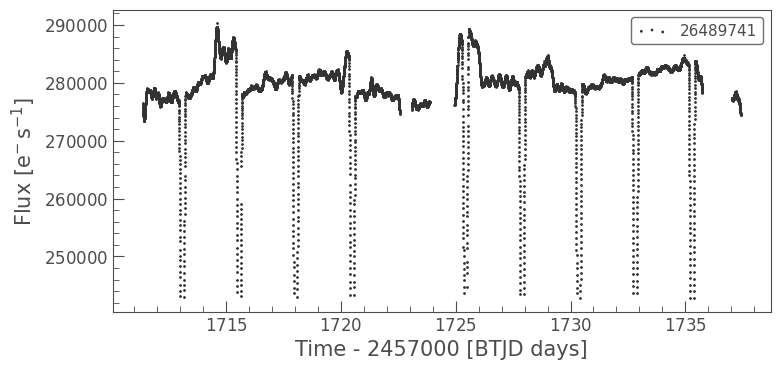

In [ ]:
plot = second_target.plot_cleaned_lc()
plot

Flux array: [276430.78 276441.06 276290.2  ... 274605.38 274522.56 274482.7 ] 
Time array: [1711.36696444 1711.36835332 1711.3697422  ... 1737.40830615 1737.40969502
 1737.41108389]


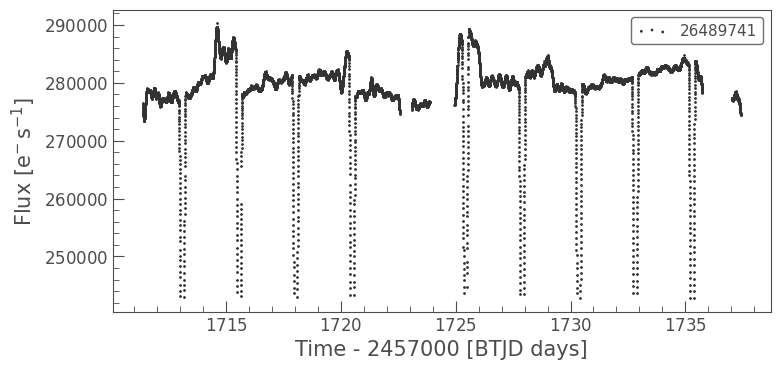

In [ ]:
%matplotlib inline
print( 'Flux array:', lc.flux, '\nTime array:', lc.time )

lc.scatter();

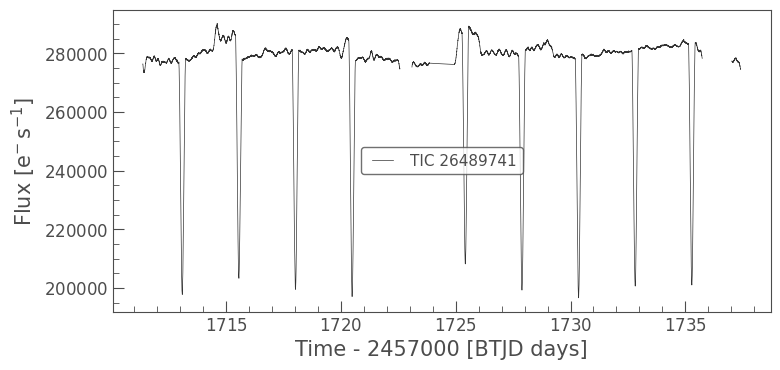

In [ ]:
%matplotlib inline
second_target.plot_raw_data();

## **Testing BLS Function**

In [ ]:
def periods(N=1000):
  period=np.logspace(-0.523, 1.43, N, endpoint=True)
  return period

def duration_grid(N=10):
  duration=np.linspace(.01, 0.298, N)
  return duration

def flatten(lc):
  lc_flat = lc.flatten()
  flat_time = lc_flat.time - lc_flat.time[0]
  return lc_flat, flat_time

In [ ]:
def BLS(periodgrid,lightcurve,flat_time, durationgrid):
  from astropy.timeseries import BoxLeastSquares
  '''
  Purppose
  ------------------
  A Box Least Squares function to print out the compute stats of the periodogram.
  Parameters
  -------------------
  period grid            - describes how often the transit is happening (arrays different value)
  duration grid          - describes the width of the transit (array of different values)
  lightcurve             - lightkurve class object
  Return
  list of stats in the following the order: period, duration, transit-time, power, depth
  ------------------
  Calculate several statistics of a candidate transit.
  '''
  #assigning parameters to variables
  period = periodgrid
  duration = durationgrid
  lc = lightcurve
  #t = timestamps
  #y = observations
  t = flat_time #lc.time #time
  y = lc.flux #flux
  #dy is the uncertianty
  model = BoxLeastSquares(t, y, dy= lc.flux_err)
  periodogram = model.power(period,duration)
  max_power = np.argmax(periodogram.power)
  #calculates the max stats w/in the transit
  stats = [periodogram.period[max_power],
          periodogram.duration[max_power],
          periodogram.transit_time[max_power],
           max_power,
           periodogram.depth[max_power]]
  #stats is the one peak, periodogram is the areay
  return stats

In [ ]:
target2_id = 26489741 
target2_sector = 15
second_star = [target2_id,target2_sector]

#initiate a class with our data
second_target = op.OpenAndPlot(second_star)

second_lc = second_target.open_lc(stage="clean")

In [ ]:
pgrid = periods()
dgrid = duration_grid()
lc = flatten(second_lc)

In [ ]:
# test BLS function

mystats= BLS(pgrid, lc[0], lc[1], dgrid)
mystats

# Order of values
# period, duration, transit, max power, depth

[2.4655789803104464, 0.234, 1.724, 468, 0.07909614433528643]